<a href="https://colab.research.google.com/github/DoyulPark/pdm08/blob/master/py-tensorflow/final_notebook/cifar_10_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**기말고사 과제**
#문제

1.mnist, fmnist, cifar10 순으로 간단한 CNN 모델의 성능(정확도)이 낮아지는 이유를 설명하시오. cifar10_final.ipynb 파일 앞 부분에 설명을 추가.
	
	
	
2.cifar10 데이터에 대한 분류 정확도가 높은 모델을 만드는 방법과 최적 모델을 구하시오.

#1번문제



 mnist데이터셋은 0~9 까지의 숫자를 필기체 이미지와 라벨 데이터를 가지고 있는 데이터셋으로 28x28 사이즈 크기에 흑백을 가진다. traindata 60000개 test data 10000개 valdation data 5000개로 구성되어 있다.

cifar10 데이터셋의 경우 총 10개의 클래스를 가지는 이미지와 라벨 데이터를 가지고 있는 데이터셋이다. 32x32 사이으 크기며 컬러를 가지고 traindata 50000개 teat data 10000개로 구성되있다.

즉,mnist의 경우 이미지 형식 비슷하고  cifar 10의 경우 이미지가 더 복잡하기에(이미지가 복잡하다는 뜻은 컬러도 포함되어 있다.) accuracy가 낮을수 밖에 없다

#2번문제

분류 정확도를 올리는 방법으로는 적당한 layer을 추가하고 (너무 많이 추가하면 정확도에 악향을 줄수도 있다 내가 만든 C2F6모델을 보면 C2F3보다 정확도가 떨어진다), 또한 DROPOUT비율을 조절하면 정확도가 올라간다. 최종 모델은 C3F5이다.

레이어를 추가한다 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.3.0


In [ ]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [ ]:
from keras.datasets import cifar10

(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

# Reshape
# X_train = X_train0.reshape(60000,28,28,1)
# X_test = X_test0.reshape(10000,28,28,1)

# Normalization reshape를 안하고 normalize를 한다. mnist는 흑백이기 때문에 칼라채널이1인데 4차원으로 구성되어있지않았는데 cifar10은 이미 4차원 구조로 구성되어있다
X_train, X_test = X_train0/255.0, X_test0/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

X_train=(50000, 32, 32, 3)
y_train=(50000, 1)
X_test=(10000, 32, 32, 3)
y_test=(10000, 1)


In [ ]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [ ]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((50000, 1), (50000, 10))

### Display images in CIFAR-10
- one random image
- 10 representative images

39378


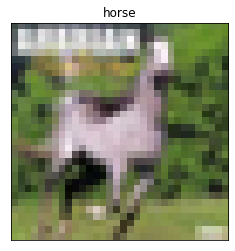

In [ ]:
# Code here!
# display one random image from the training set:
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

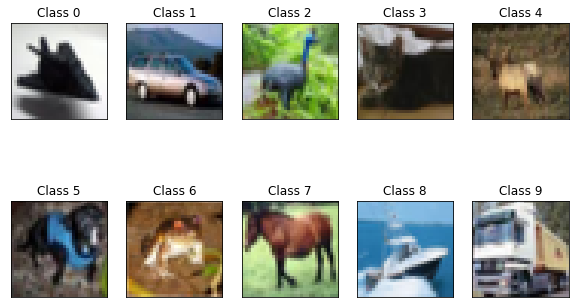

In [ ]:
fig = plt.figure(figsize=(10,6))
num0_9 = np.unique(y_train0, return_index=True)[1] #np.unique로 사진을 찾는다, y_train0는 무슨인코딩하기전 ,[1]두번째항목선택
images = X_train[num0_9]
for i in range(10):
    plt.subplot(2, 5, i+1)
    # num0_9 = X_train0[y_train0 == i]
    
    # print(num0_9.shape)
    # plt.imshow(num0_9[0]) 
    plt.imshow(images[i])
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

## **CNN2 + FCN2**

In [ ]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',   #최적화 함수는 adam함수
              loss='categorical_crossentropy',  #손실함수는(3가지이상의 함수) categorical_crossentropy
              metrics=['accuracy']) 

In [ ]:
c2f2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               524416    
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)              

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50 (50은 시간이 너무 많이 걸림)

In [ ]:
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4495 - accuracy: 0.4752 - val_loss: 1.1271 - val_accuracy: 0.6066
Epoch 2/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0808 - accuracy: 0.6202 - val_loss: 0.9718 - val_accuracy: 0.6590
Epoch 3/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9413 - accuracy: 0.6697 - val_loss: 0.9210 - val_accuracy: 0.6842
Epoch 4/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8452 - accuracy: 0.7040 - val_loss: 0.8638 - val_accuracy: 0.7015
Epoch 5/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7669 - accuracy: 0.7319 - val_loss: 0.8315 - val_accuracy: 0.7132
Epoch 6/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6966 - accuracy: 0.7534 - val_loss: 0.8183 - val_accuracy: 0.7234
Epoch 7/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6361 - accuracy: 0.7732 - val_loss: 0.8762 - val_ac

In [ ]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 3ms/step - loss: 1.5231 - accuracy: 0.6998


[1.523103952407837, 0.6998000144958496]

## **CNN2 + FCN3**

In [ ]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  #layer가 하나 추가됨
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c2f3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               524416    
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)              

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f3_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [ ]:
c2f3.fit(X_train, y_train, epochs=500, batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5337 - accuracy: 0.4411 - val_loss: 1.2074 - val_accuracy: 0.5636
Epoch 2/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1676 - accuracy: 0.5919 - val_loss: 1.0389 - val_accuracy: 0.6383
Epoch 3/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0212 - accuracy: 0.6446 - val_loss: 0.9241 - val_accuracy: 0.6837
Epoch 4/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9248 - accuracy: 0.6798 - val_loss: 0.8904 - val_accuracy: 0.6893
Epoch 5/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8498 - accuracy: 0.7044 - val_loss: 0.8580 - val_accuracy: 0.7104
Epoch 6/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7878 - accuracy: 0.7275 - val_loss: 0.8702 - val_accuracy: 0.6990
Epoch 7/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7339 - accuracy: 0.7452 - val_loss: 0.8315 - val_ac

In [ ]:
 c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 3ms/step - loss: 2.3076 - accuracy: 0.1076


[2.3075764179229736, 0.10760000348091125]

In [ ]:
c3f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  #layer가 하나 추가됨
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c3f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c3f3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)            

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c3f3_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [ ]:
c3f3.fit(X_train, y_train, epochs=500, batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2344 - accuracy: 0.5586 - val_loss: 1.0317 - val_accuracy: 0.6394
Epoch 2/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0387 - accuracy: 0.6356 - val_loss: 0.9260 - val_accuracy: 0.6752
Epoch 3/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9225 - accuracy: 0.6796 - val_loss: 0.8715 - val_accuracy: 0.6977
Epoch 4/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8383 - accuracy: 0.7092 - val_loss: 0.8382 - val_accuracy: 0.7116
Epoch 5/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7793 - accuracy: 0.7313 - val_loss: 0.8250 - val_accuracy: 0.7178
Epoch 6/500
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7252 - accuracy: 0.7494 - val_loss: 0.8318 - val_accuracy: 0.7189
Epoch 7/500
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6780 - accuracy: 0.7637 - val_loss: 0.8185 - val_ac

KeyboardInterrupt: ignored

##CNN2+FCN6

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Activation,Dropout ,BatchNormalization
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import optimizers

In [ ]:
 model = Sequential([
          Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
          Dense(128),
          BatchNormalization(),
          Activation("relu"),
          Dropout(0.5),
          Dense(128),
          BatchNormalization(),
          Activation("relu"),
          Dropout(0.5),
          Dense(128),
          BatchNormalization(),
          Activation("relu"),
          Dropout(0.5),
          Dense(128),
          BatchNormalization(),
          Activation("relu"),
          Dropout(0.5),
          Dense(1)
      ])

In [ ]:
c2f6 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  #layer가 하나 추가됨
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c2f6.summary()

NameError: ignored

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f6_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [ ]:
c2f6.fit(X_train, y_train, epochs=500, batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8848 - accuracy: 0.2609 - val_loss: 1.4945 - val_accuracy: 0.4235
Epoch 2/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4544 - accuracy: 0.4685 - val_loss: 1.2872 - val_accuracy: 0.5509
Epoch 3/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2497 - accuracy: 0.5662 - val_loss: 1.1179 - val_accuracy: 0.6139
Epoch 4/500
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1234 - accuracy: 0.6197 - val_loss: 1.0775 - val_accuracy: 0.6314
Epoch 5/500
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0356 - accuracy: 0.6509 - val_loss: 1.0145 - val_accuracy: 0.6543
Epoch 6/500
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9571 - accuracy: 0.6803 - val_loss: 0.9901 - val_accuracy: 0.6728
Epoch 7/500
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8950 - accuracy: 0.7025 - val_loss: 0.9878 - val_ac

In [ ]:
c2f6.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 3ms/step - loss: 1.9036 - accuracy: 0.7116


[1.9036192893981934, 0.7116000056266785]

# **[DIY] Hidden layer에 따른 정확도**

In [ ]:
score1=c2f3.evaluate(X_test, y_test, batch_size = 32)
score2=c2f3.evaluate(X_test, y_test, batch_size = 32)
losses = [score1[0],score2[0]]
accuracies= [score1[1],score2[1]]
losses,accuracies

313/313 [==============================] - 1s 3ms/step - loss: 2.3076 - accuracy: 0.1076


([2.3075764179229736, 2.3075764179229736],
 [0.10760000348091125, 0.10760000348091125])

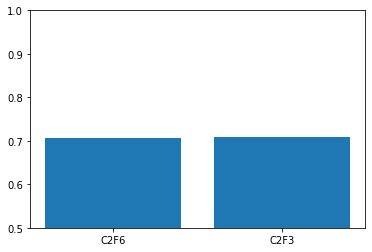

In [ ]:
x = np.arange(2)
cnns = ['C2F6','C2F3']

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((.5,1.0))
plt.show()

## Complex model
- C4F5 model

![cnn_c4f5.png](https://raw.githubusercontent.com/Redwoods/Py/master//pdm2020/my-note/py-tensorflow/images/cnn_c4f5.png)

In [ ]:
c4f4 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 256,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 512,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),   #5단짜리 dense를 만들어준다
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
])

c4f4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c4f4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 4, 4, 512)       

In [ ]:
c4f5 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 256,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 512,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),   #5단짜리 dense를 만들어준다
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c4f5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c4f4_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [ ]:
c4f4.fit(X_train, y_train, epochs=500, batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500


ValueError: ignored

In [ ]:
c4f5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 512)        

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c4f5_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [ ]:
c4f5.fit(X_train, y_train, epochs=500, batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6782 - accuracy: 0.3557 - val_loss: 1.3481 - val_accuracy: 0.5024
Epoch 2/500
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2402 - accuracy: 0.5565 - val_loss: 1.0675 - val_accuracy: 0.6290
Epoch 3/500
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0470 - accuracy: 0.6369 - val_loss: 1.0157 - val_accuracy: 0.6525
Epoch 4/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9265 - accuracy: 0.6825 - val_loss: 0.9822 - val_accuracy: 0.6663
Epoch 5/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8352 - accuracy: 0.7188 - val_loss: 0.9419 - val_accuracy: 0.6743
Epoch 6/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7674 - accuracy: 0.7441 - val_loss: 0.8872 - val_accuracy: 0.7121
Epoch 7/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7042 - accuracy: 0.7634 - val_loss: 0.9166 -

In [ ]:
 c4f5.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 4ms/step - loss: 1.1980 - accuracy: 0.7345


[1.1980160474777222, 0.734499990940094]

## Graph of loss and accuracy
- model: C4f5

In [ ]:
c4f5 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 256,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 512,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c4f5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epoch = 39
hist = c4f5.fit(X_train, y_train, 
         epochs = epoch, 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/39
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6628 - accuracy: 0.3705 - val_loss: 1.3128 - val_accuracy: 0.5197
Epoch 2/39
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2439 - accuracy: 0.5598 - val_loss: 1.0956 - val_accuracy: 0.6105
Epoch 3/39
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0476 - accuracy: 0.6386 - val_loss: 1.0103 - val_accuracy: 0.6499
Epoch 4/39
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9347 - accuracy: 0.6825 - val_loss: 0.9706 - val_accuracy: 0.6686
Epoch 5/39
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8455 - accuracy: 0.7132 - val_loss: 0.9105 - val_accuracy: 0.6967
Epoch 6/39
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7664 - accuracy: 0.7415 - val_loss: 0.8977 - val_accuracy: 0.6971
Epoch 7/39
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7089 - accuracy: 0.7644 - val_loss: 0.8894 - val_ac

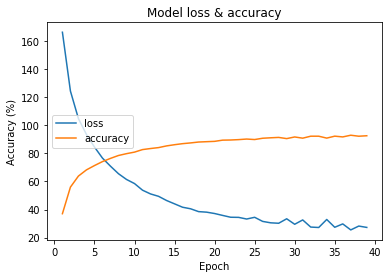

In [ ]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = epoch
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [ ]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

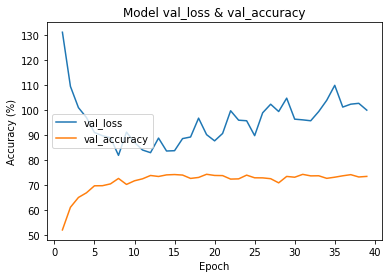

In [ ]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

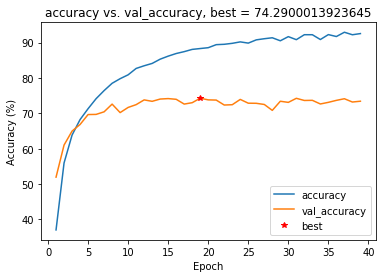

In [ ]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.title('accuracy vs. val_accuracy, best = ' +str(vacc_list[np.argmax(np.array(vacc_list))]))
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best']) #, loc='center bottom')


## cifar10 모델 학습
> https://gruuuuu.github.io/machine-learning/cifar10-cnn/#

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [ ]:
# c2f2.save('fmnist_cnn_best.hdf5')

In [ ]:
from keras.models import load_model

model = load_model('cifar10_c4f5_best_weights.046-0.7488.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 0.9885 - accuracy: 0.7488


[0.988508403301239, 0.7487999796867371]

정확도 올리기


## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
predictions0 = np.argmax(predictions, axis=1)
predictions0.shape

(10000,)

In [ ]:
cm = confusion_matrix(y_test0, predictions0)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

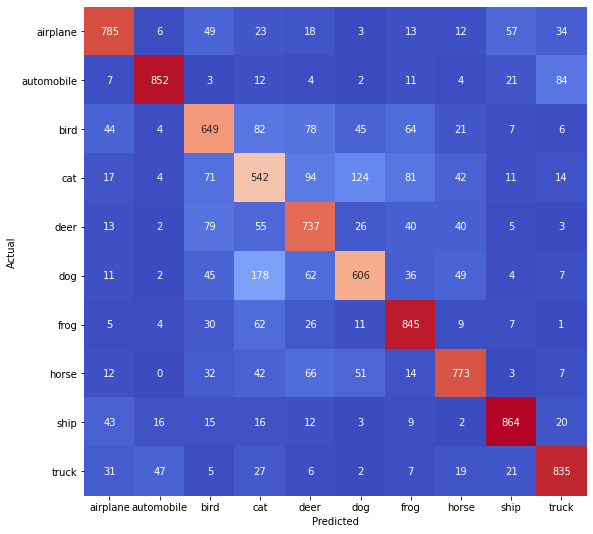

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# State of current scores of cifar-10

> https://paperswithcode.com/sota/image-classification-on-cifar-10

## Transfer learning on cifar-10

- https://medium.com/@andrew.dabydeen/transfer-learning-using-resnet50-and-cifar-10-6242ed4b4245

- https://medium.com/swlh/comparative-analysis-of-cifar-10-image-classification-transfer-learning-vs-user-defined-cnns-e673685d925e

- https://medium.com/swlh/hands-on-the-cifar-10-dataset-with-transfer-learning-2e768fd6c318

- https://medium.com/analytics-vidhya/the-transfer-learning-experience-with-vgg16-and-cifar-10-dataset-9b25b306a23f